## Time Series Encoder-Decoder

In [1]:
# DAL ToolBox
# version 1.01.727

source("https://raw.githubusercontent.com/cefet-rj-dal/daltoolbox/main/jupyter.R")

#loading DAL
load_library("daltoolbox")

Loading required package: daltoolbox

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform




### Series for studying

In [2]:
data(sin_data)
sin_data$y[39] <- sin_data$y[39]*6

In [3]:
sw_size <- 5
ts <- ts_data(sin_data$y, sw_size)
ts_head(ts, 3)

t4        t3        t2        t1        t0       
[1,] 0.0000000 0.2474040 0.4794255 0.6816388 0.8414710
[2,] 0.2474040 0.4794255 0.6816388 0.8414710 0.9489846
[3,] 0.4794255 0.6816388 0.8414710 0.9489846 0.9974950

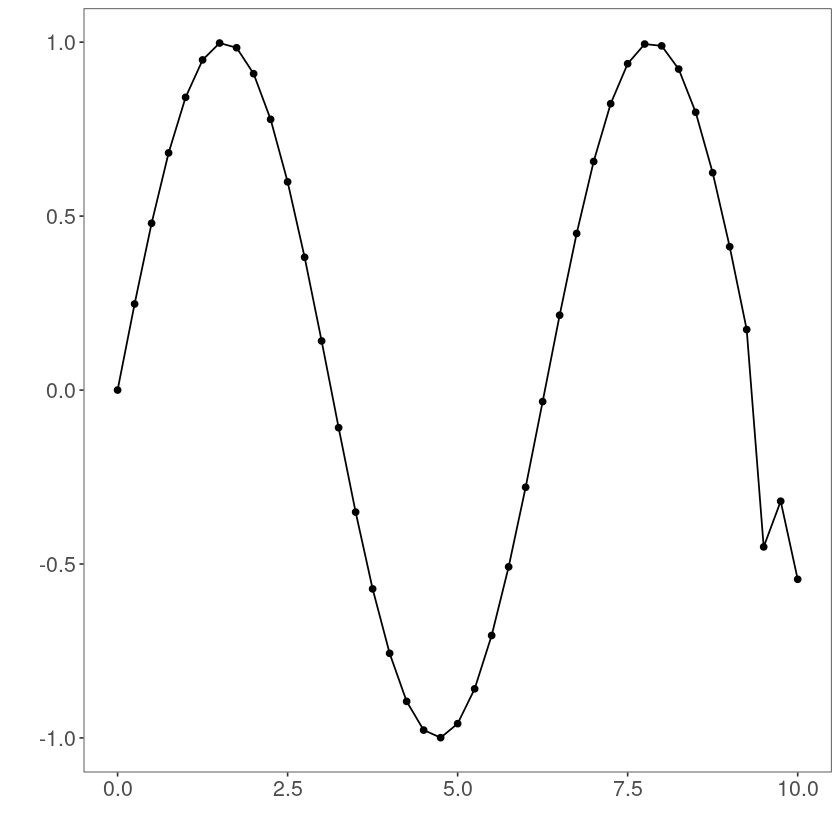

In [4]:
library(ggplot2)
plot_ts(x=sin_data$x, y=sin_data$y) + theme(text = element_text(size=16))

### data sampling

In [5]:
samp <- ts_sample(ts, test_size = 5)
train <- as.data.frame(samp$train)
test <- as.data.frame(samp$test)

### Model training

In [6]:
auto <- autoenc_encode_decode(5, 3)
auto <- fit(auto, train)

### Evaluation of encoding

In [7]:
print(head(train))
result <- transform(auto, train)
print(head(result))


         t4        t3        t2        t1        t0
1 0.0000000 0.2474040 0.4794255 0.6816388 0.8414710
2 0.2474040 0.4794255 0.6816388 0.8414710 0.9489846
3 0.4794255 0.6816388 0.8414710 0.9489846 0.9974950
4 0.6816388 0.8414710 0.9489846 0.9974950 0.9839859
5 0.8414710 0.9489846 0.9974950 0.9839859 0.9092974
6 0.9489846 0.9974950 0.9839859 0.9092974 0.7780732
             [,1]      [,2]      [,3]      [,4]      [,5]
[1,] -0.004191756 0.2462921 0.4814242 0.6770536 0.8459271
[2,]  0.248961478 0.4771790 0.6811147 0.8404140 0.9493391
[3,]  0.481032491 0.6820769 0.8419251 0.9513780 0.9946754
[4,]  0.681217909 0.8471168 0.9524983 1.0001717 0.9831275
[5,]  0.836946726 0.9465855 0.9962497 0.9818403 0.9088043
[6,]  0.950629234 0.9961782 0.9842113 0.9097705 0.7801622


### Encoding of test

In [8]:
print(head(test))
result <- transform(auto, test)
print(head(result))


         t4        t3         t2         t1         t0
1 0.9893582 0.9226042  0.7984871  0.6247240  0.4121185
2 0.9226042 0.7984871  0.6247240  0.4121185  0.1738895
3 0.7984871 0.6247240  0.4121185  0.1738895 -0.4509067
4 0.6247240 0.4121185  0.1738895 -0.4509067 -0.3195192
5 0.4121185 0.1738895 -0.4509067 -0.3195192 -0.5440211
          [,1]       [,2]        [,3]        [,4]       [,5]
[1,] 0.9789732 0.91938663  0.79106337  0.61892200  0.4130753
[2,] 0.9214174 0.80100203  0.63157320  0.41815925  0.1717837
[3,] 0.8788599 0.65549433  0.32314265  0.01232578 -0.3259693
[4,] 0.5911755 0.33225980  0.09802489 -0.17992663 -0.4334857
[5,] 0.3195642 0.06253581 -0.22450969 -0.47189766 -0.6820623
